In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings

warnings.simplefilter(action = 'ignore', category = FutureWarning)

# Preprocessing Functions

In [3]:
def read_demographics(df):
    df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col])
    df = df.dropna().reset_index(drop=True)
    return df

In [4]:
participants = ['p1', 'p2', 'p3', 'p4']

demo_graphics = [pd.read_excel(f'./{i}_human_evaluation/demographic_questions.xlsx').assign(participant=i) for i in participants]
demo_graphics = [read_demographics(df) for df in demo_graphics]

In [5]:
demo_graphics_concated = pd.concat(demo_graphics, axis = 0)
demo_graphics_concated

,Education Level,Professional Background,Years of Experience in Software Development/Requirements Engineering,Familiarity with AI-Generated Content,"Do you use generative AI tools (e.g., ChatGPT) for software development/Requirements Engineering?",participant
0,Master’s Degree,Software Engineering/Development,1-3 years,Somewhat familiar,No,p1
0,Master’s Degree,Software Engineering/Development,4-6 years,Moderately familiar,Sometimes,p2
0,Master’s Degree,Software Engineering/Development,4-6 years,Very familiar,Yes,p3
0,Master’s Degree,Software Engineering/Development,1-3 years,Very familiar,Sometimes,p4


In [6]:
# Calculate the average experience range

demo_graphics_concated[["Low Bound", "High Bound"]] = demo_graphics_concated[
    "Years of Experience in Software Development/Requirements Engineering"
].str.extract(r"(\d+)-(\d+)").astype(float)


demo_graphics_concated["Average Experience"] = (demo_graphics_concated["Low Bound"] + demo_graphics_concated["High Bound"]) / 2

overall_low_bound = demo_graphics_concated["Low Bound"].mean()
overall_high_bound = demo_graphics_concated["High Bound"].mean()
overall_average_experience = demo_graphics_concated["Average Experience"].mean()

print(f"Overall Low Bound (in years): {overall_low_bound:.2f}")
print(f"Overall High Bound (in years): {overall_high_bound:.2f}")
print(f"Overall Average Experience (in years): {overall_average_experience:.2f}")

Overall Low Bound (in years): 2.50
Overall High Bound (in years): 4.50
Overall Average Experience (in years): 3.50


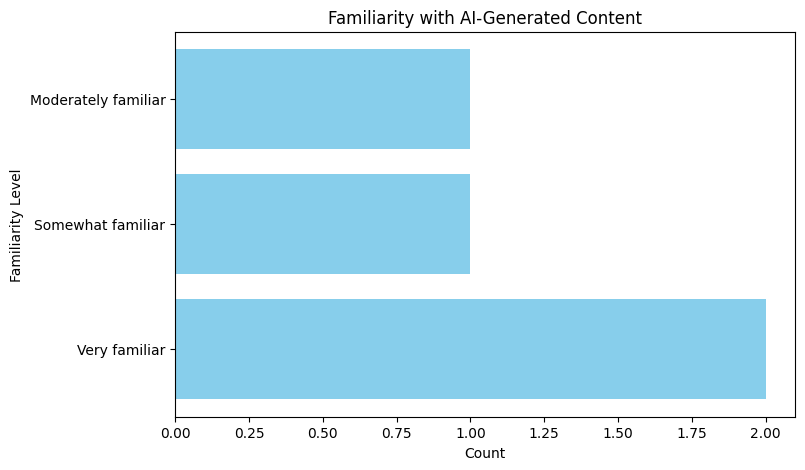

In [7]:
# Visualization 1: Distribution of Familiarity with AI
familiarity_counts = demo_graphics_concated["Familiarity with AI-Generated Content"].value_counts()
plt.figure(figsize=(8, 5))
plt.barh(familiarity_counts.index, familiarity_counts.values, color="skyblue")
plt.title("Familiarity with AI-Generated Content")
plt.xlabel("Count")
plt.ylabel("Familiarity Level")
plt.show()

Cross-tabulation of AI familiarity vs Tool usage:
 Do you use generative AI tools (e.g., ChatGPT) for software development/Requirements Engineering?  No  \
Familiarity with AI-Generated Content                                                                   
Moderately familiar                                                                                 0   
Somewhat familiar                                                                                   1   
Very familiar                                                                                       0   

Do you use generative AI tools (e.g., ChatGPT) for software development/Requirements Engineering?  Sometimes  \
Familiarity with AI-Generated Content                                                                          
Moderately familiar                                                                                        1   
Somewhat familiar                                                                      

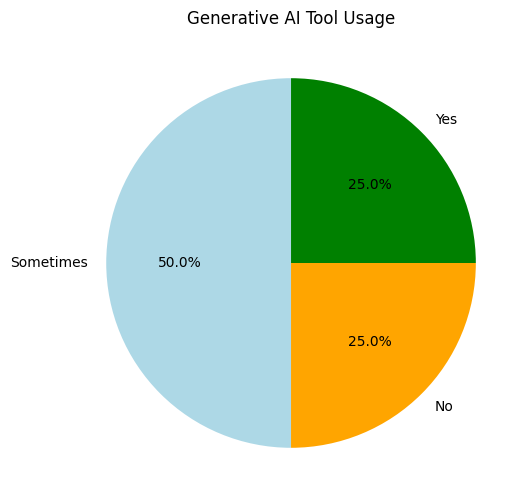

In [8]:
# Cross-tabulation: AI familiarity vs Tool usage
crosstab = pd.crosstab(demo_graphics_concated["Familiarity with AI-Generated Content"], 
                       demo_graphics_concated["Do you use generative AI tools (e.g., ChatGPT) for software development/Requirements Engineering?"])
print("Cross-tabulation of AI familiarity vs Tool usage:\n", crosstab)

# Calculating average familiarity (assuming ordinal mapping: 1=Somewhat, 2=Moderately, 3=Very familiar)
familiarity_mapping = {"Somewhat familiar": 1, "Moderately familiar": 2, "Very familiar": 3}
demo_graphics_concated["Familiarity Score"] = demo_graphics_concated["Familiarity with AI-Generated Content"].map(familiarity_mapping)
average_familiarity = demo_graphics_concated["Familiarity Score"].mean()
print(f"Average Familiarity Score: {average_familiarity:.2f}")

usage_counts = demo_graphics_concated["Do you use generative AI tools (e.g., ChatGPT) for software development/Requirements Engineering?"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(usage_counts.values, labels=usage_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightblue", "orange", "green"])
plt.title("Generative AI Tool Usage")
plt.show()